# <b>Assignment</b>

<font color='black'><b>Task:</font></b> The given dataset contains details about organic chemical compounds including their chemical features, isomeric conformation, names and the classes in which they are classified. The compounds are classified as either ‘Musk’ or ‘Non-Musk’ compounds. Our task is to build a classification model on the given data using any Deep Learning approach  viz. Multi-Layer Perceptron, CNN, RNN, etc.

### Loading libraries

In [77]:
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

### Loading data using pandas dataframe

In [78]:
data=pd.read_csv('musk_csv.csv')
data.head(5)

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [79]:
data.tail(5)

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
6593,6594,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,...,-66,164,-14,-29,107,171,-44,-115,118,0
6594,6595,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,...,-51,166,-9,150,129,158,-66,-144,-5,0
6595,6596,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,...,90,117,-8,150,130,159,-66,-144,-6,0
6596,6597,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,...,86,99,-14,-31,106,171,-44,-116,117,0
6597,6598,NON-MUSK-jp13,jp13_2+9,51,-122,-23,-106,-117,190,-161,...,40,124,-14,-30,107,171,-44,-115,118,0


In [81]:
# No. of datapoints
x=data.shape[0]
print("Number of data points in the dataset is",x)

Number of data points in the dataset is 6598


In [82]:
# No. of features
x1=data.shape[1]
print("Number of features in the dataset is",x1)

Number of features in the dataset is 170


### No. of unique counts of each class

In [83]:
# no. of datapoints in each class 0 and 1.
data['class'].value_counts()

0    5581
1    1017
Name: class, dtype: int64

## Data Preprocessing

### Missing value analysis

In [84]:
# missing value analysis
data.isnull().sum() 

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
f3                   0
f4                   0
f5                   0
f6                   0
f7                   0
f8                   0
f9                   0
f10                  0
f11                  0
f12                  0
f13                  0
f14                  0
f15                  0
f16                  0
f17                  0
f18                  0
f19                  0
f20                  0
f21                  0
f22                  0
f23                  0
f24                  0
f25                  0
f26                  0
f27                  0
                    ..
f138                 0
f139                 0
f140                 0
f141                 0
f142                 0
f143                 0
f144                 0
f145                 0
f146                 0
f147                 0
f148                 0
f149                 0
f150       

### Outlier analysis

In [85]:
# Doing outlier analysis on the features of molecules that includes feature f1,f2....f50.
def plot_feature_boxplot(df, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,5,figsize=(18,24))

    for feature in features:
        i += 1
        plt.subplot(10,5,i)
        sns.boxplot(df[feature]) 
        plt.xlabel(feature, fontsize=11)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', labelsize=6, pad=-6)
        plt.tick_params(axis='y', labelsize=6)
    plt.show()

<Figure size 432x288 with 0 Axes>

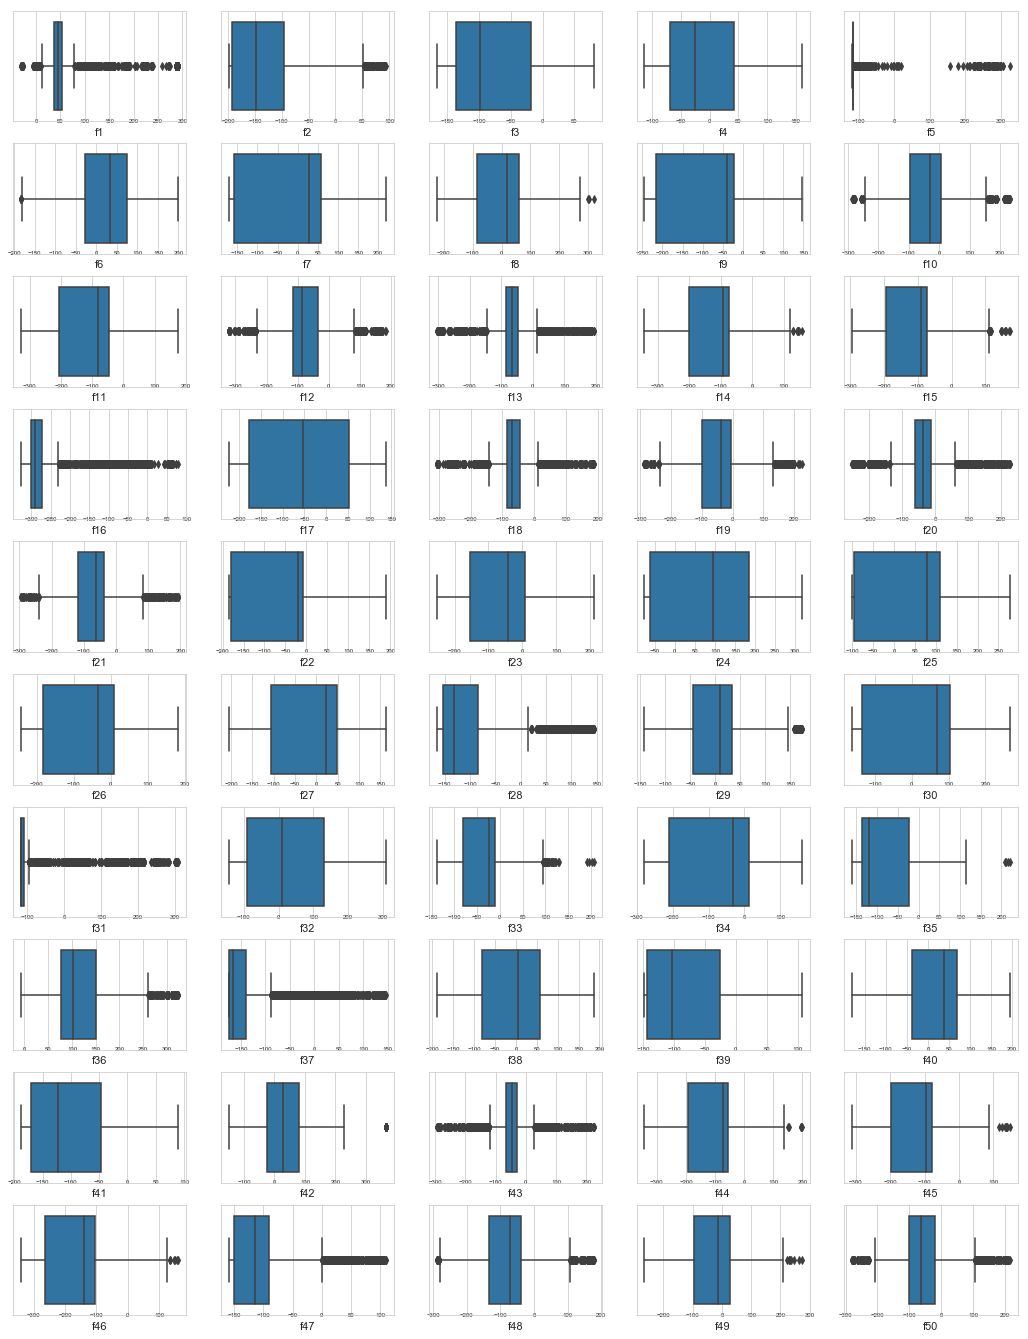

In [86]:
features = data.columns.values[3:53]
plot_feature_boxplot(data, features)

<Figure size 432x288 with 0 Axes>

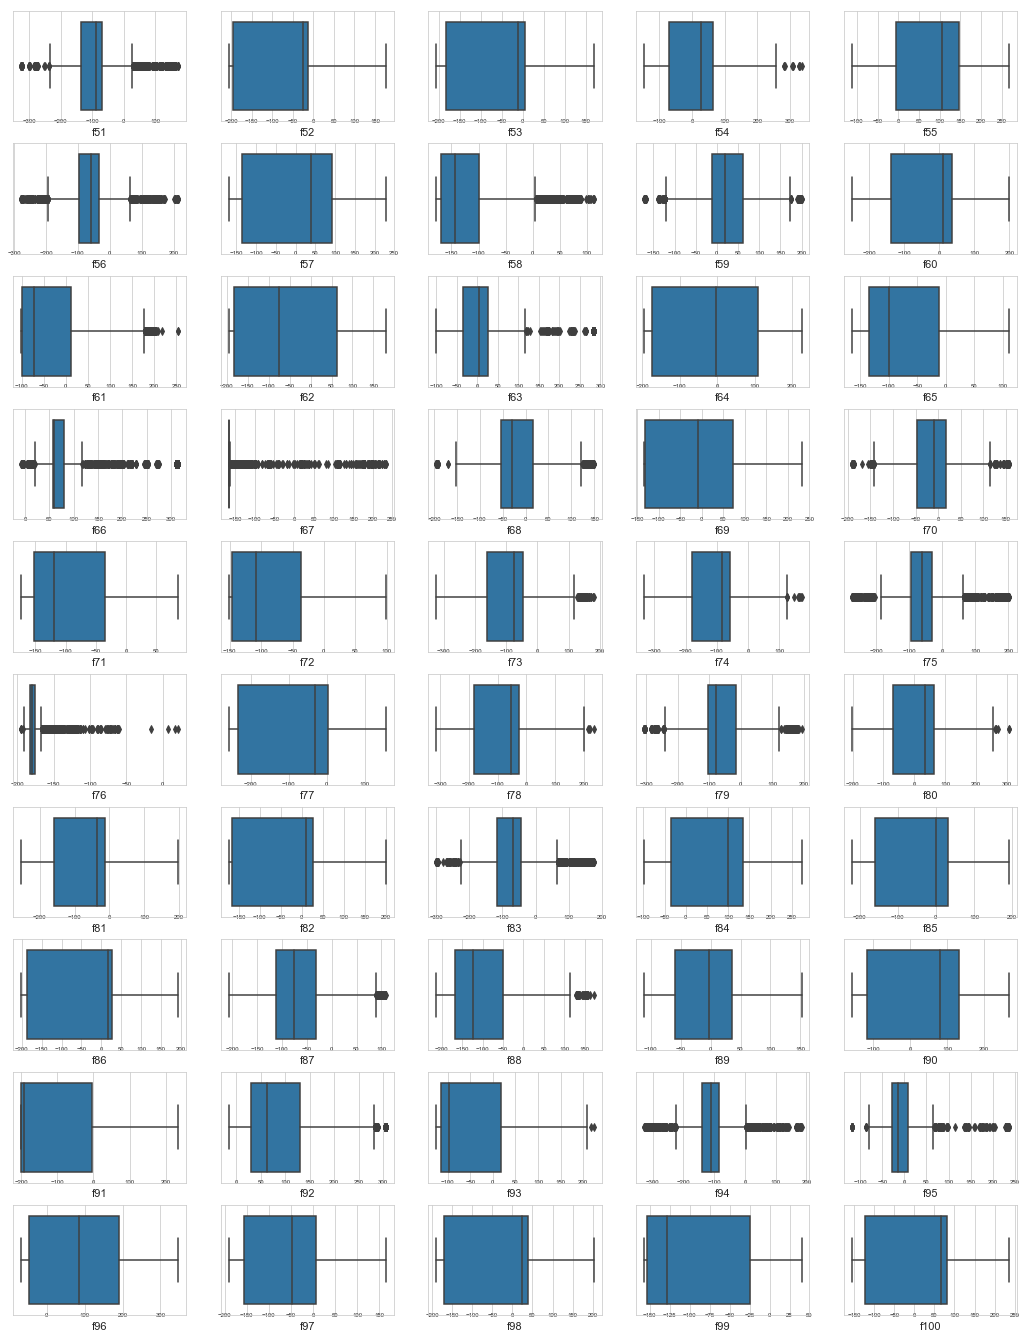

In [87]:
features = data.columns.values[53:103]
plot_feature_boxplot(data, features)

### Observation:-
- This is an imbalanced dataset.
- This is a binary classification problem where class 1 means MUSK compound and class 0 mean NON-MUSK compound.
- No missing value is present in the dataset.
- According to our dataset their is no need to remove outliers here.

### Correlation analysis

In [27]:
# Correlation analysis
# Create correlation matrix
corr_matrix = data.corr().abs()

In [28]:
# dropping columns having very high correlation
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.92
to_drop = [column for column in upper.columns if any(upper[column] > 0.92)]

In [29]:
type(to_drop)

list

In [30]:
data = data.drop(to_drop,axis=1)

In [32]:
# After drop size of dataframe
x2=data.shape
print("Shape of data after removing correlation is",x2)

Shape of data after removing correlation is (6598, 117)


## Split data into train and test in the 80:20 ratio

In [33]:
train,test = train_test_split(data, random_state=30, test_size = 0.2)

In [34]:
train.shape

(5278, 117)

In [35]:
Xtrain = train.iloc[:,3:-1]
Xtrain.shape

(5278, 113)

In [36]:
Xtrain.columns

Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       ...
       'f157', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165',
       'f166'],
      dtype='object', length=113)

In [37]:
Ytrain = train.iloc[:,-1:]
Xtest = test.iloc[:,3:-1]
Ytest = test.iloc[:,-1:]

In [38]:
Ytest.shape

(1320, 1)

In [39]:
x=[1]*Xtrain.shape[0]
Xtrain["demo"]=x
y=[1]*Xtest.shape[0]
Xtest["demo"]=y

In [40]:
Xtrain.shape

(5278, 114)

In [41]:
Xtest.shape

(1320, 114)

## Model

## CNN

In [58]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [59]:
x_train=Xtrain.values.reshape(Xtrain.shape[0],19,6,1)
x_test=Xtest.values.reshape(Xtest.shape[0],19,6,1)

In [60]:
x_train.shape

(5278, 19, 6, 1)

In [61]:
x_test.shape

(1320, 19, 6, 1)

In [68]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(19,6,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [69]:
model.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [70]:
history = model.fit(x_train,Ytrain,batch_size=128,epochs=30,validation_data=(x_test,Ytest))
score=model.evaluate(x_test,Ytest,verbose=0)
print(score)

Train on 5278 samples, validate on 1320 samples
Epoch 1/30
5278/5278 [==============================] - 1s 198us/step - loss: 2.5384 - acc: 0.8397 - val_loss: 2.3567 - val_acc: 0.8538
Epoch 2/30
5278/5278 [==============================] - 1s 123us/step - loss: 2.5113 - acc: 0.8439 - val_loss: 2.3567 - val_acc: 0.8538
Epoch 3/30
5278/5278 [==============================] - 1s 122us/step - loss: 2.3276 - acc: 0.8422 - val_loss: 1.1226 - val_acc: 0.9144
Epoch 4/30
5278/5278 [==============================] - 1s 125us/step - loss: 1.1832 - acc: 0.8767 - val_loss: 0.3896 - val_acc: 0.9242
Epoch 5/30
5278/5278 [==============================] - 1s 124us/step - loss: 0.3137 - acc: 0.9062 - val_loss: 0.1523 - val_acc: 0.9386
Epoch 6/30
5278/5278 [==============================] - 1s 126us/step - loss: 0.2135 - acc: 0.9231 - val_loss: 0.1256 - val_acc: 0.9462
Epoch 7/30
5278/5278 [==============================] - 1s 128us/step - loss: 0.1791 - acc: 0.9272 - val_loss: 0.1464 - val_acc: 0.9424


In [71]:
score1=model.evaluate(x_train,Ytrain,verbose=0)


### Performance Measure

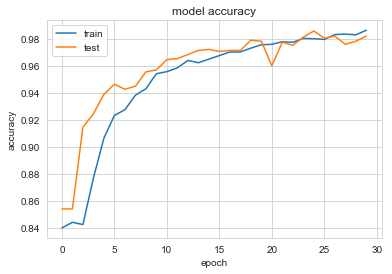

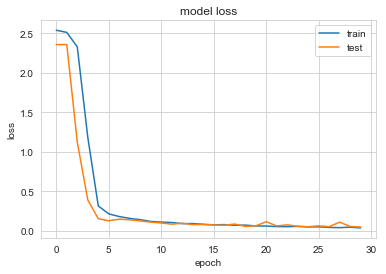

In [72]:
%matplotlib inline

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [73]:
print("f1_score:",f1_score(Ytest,model.predict_classes(x_test),))
print("recall:",recall_score(Ytest,model.predict_classes(x_test),))
print("Validation Loss:",score[0])
print("Validation Accuracy:",score[1])

f1_score: 0.9387755102040817
recall: 0.9533678756476683
Validation Loss: 0.046602997924624516
Validation Accuracy: 0.9818181818181818


In [89]:
print("Train f1_score:",f1_score(Ytrain,model.predict_classes(x_train),))
print("Train recall:",recall_score(Ytrain,model.predict_classes(x_train),))
print("Train Validation Loss:",score1[0])
print("Train Validation Accuracy:",score1[1])

Train f1_score: 0.9862192929898141
Train recall: 0.9987864077669902
Train Validation Loss: 0.018644546375826267
Train Validation Accuracy: 0.995642288745737


In [90]:
model.save('model.h5')